# Loading
## Loading important packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.feature_selection import SelectKBest, f_regression, SelectPercentile, mutual_info_regression, VarianceThreshold, SelectFromModel
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor,  AdaBoostRegressor, VotingRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn import set_config
set_config(display = 'diagram')

import category_encoders as ce

## Loading and observing data

In [2]:
data = pd.read_csv("~/code/aplabey/2nd_hand_fashion_valuation/raw_data/vestiaire.csv")

In [3]:
data.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,Tourcoing,25775970,vitalii25775970,NaN,Germany,3.0,14.0,0.0,13.0,0.0
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,Tourcoing,13698770,olivia13698770,NaN,Belgium,0.0,0.0,0.0,8.0,0.0
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,Tourcoing,6042365,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,96.0
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,...,Brooklyn,13172949,gretchen13172949,1-2 days,United States,63.0,274.0,126346.0,131.0,96.0
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,...,Crawley,2578605,crunchykat,3-5 days,United Kingdom,19.0,14.0,102821.0,40.0,89.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900514 entries, 0 to 900513
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  900514 non-null  int64  
 1   product_type                900514 non-null  object 
 2   product_name                900514 non-null  object 
 3   product_description         900507 non-null  object 
 4   product_keywords            899331 non-null  object 
 5   product_gender_target       900514 non-null  object 
 6   product_category            899331 non-null  object 
 7   product_season              900512 non-null  object 
 8   product_condition           900514 non-null  object 
 9   product_like_count          900514 non-null  float64
 10  sold                        900514 non-null  bool   
 11  reserved                    900514 non-null  bool   
 12  available                   900514 non-null  bool   
 13  in_stock      

In [5]:
data.describe()

,product_id,product_like_count,brand_id,price_usd,seller_price,seller_earning,buyers_fees,seller_id,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
count,9.005140e+05,900514.000000,900514.000000,900514.000000,900514.000000,900514.000000,886778.000000,9.005140e+05,900514.000000,900514.000000,9.005140e+05,9.005140e+05,900514.000000
mean,3.810003e+07,6.298326,2437.277576,386.862536,331.639409,290.436463,55.486152,1.382227e+07,664.958267,1497.663143,5.623160e+04,9.904618e+03,72.461753
std,7.749403e+06,12.920079,3702.869580,1859.559156,1591.472807,1498.157606,290.259974,7.535593e+06,3552.744596,5460.166852,1.438156e+05,3.557486e+05,34.428663
min,1.113630e+05,0.000000,2.000000,6.130000,5.110000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,-180.000000
25%,3.811580e+07,1.000000,66.000000,83.070000,71.360000,58.580000,11.720000,7.977389e+06,6.000000,10.000000,0.000000e+00,1.700000e+01,68.000000
50%,4.174207e+07,3.000000,341.000000,168.700000,143.780000,125.370000,23.970000,1.438324e+07,34.000000,52.000000,0.000000e+00,7.300000e+01,88.000000
75%,4.267775e+07,7.000000,3266.000000,350.000000,298.200000,261.900000,50.480000,1.946235e+07,178.000000,373.000000,2.539300e+04,2.900000e+02,95.000000
max,4.324884e+07,3154.000000,18237.000000,632610.000000,527175.000000,509229.750000,105435.000000,2.608177e+07,79738.000000,39628.000000,1.064736e+06,1.417912e+07,100.000000


In [6]:
data.duplicated().sum() 

0

In [7]:
# Counting the number of NaN for each column
data.isnull().sum().sort_values(ascending=False)

usually_ships_within          154791
has_cross_border_fees          13736
buyers_fees                    13736
product_keywords                1183
product_category                1183
seller_username                   39
product_description                7
product_material                   4
product_season                     2
product_color                      1
seller_price                       0
seller_products_sold               0
seller_num_products_listed         0
seller_id                          0
warehouse_name                     0
seller_community_rank              0
seller_num_followers               0
seller_badge                       0
seller_earning                     0
seller_country                     0
product_id                         0
price_usd                          0
product_type                       0
brand_url                          0
brand_name                         0
brand_id                           0
should_be_gone                     0
i

In [8]:
# Counting the percentage of NaN for each column
data.isnull().sum().sort_values(ascending=False) / len(data) #NaN percentage for each column

usually_ships_within          0.171892
has_cross_border_fees         0.015254
buyers_fees                   0.015254
product_keywords              0.001314
product_category              0.001314
seller_username               0.000043
product_description           0.000008
product_material              0.000004
product_season                0.000002
product_color                 0.000001
seller_price                  0.000000
seller_products_sold          0.000000
seller_num_products_listed    0.000000
seller_id                     0.000000
warehouse_name                0.000000
seller_community_rank         0.000000
seller_num_followers          0.000000
seller_badge                  0.000000
seller_earning                0.000000
seller_country                0.000000
product_id                    0.000000
price_usd                     0.000000
product_type                  0.000000
brand_url                     0.000000
brand_name                    0.000000
brand_id                 

## Observing brand data

In [9]:
grouped_by_brand = data.groupby('brand_name')

In [10]:
brand_counts = grouped_by_brand.size().sort_values(ascending=False)
brand_counts

brand_name
Gucci              41009
Burberry           24018
Dolce & Gabbana    22024
Prada              20972
Hermès             18711
                   ...  
KANTIS                 1
Sevan Bicakci          1
KLEINFELD              1
Kaaskas                1
Ølaf                   1
Length: 8884, dtype: int64

### discuss about threshold (useful? size?)

In [11]:
threshold = 61
brands_with_few_counts = brand_counts[brand_counts < threshold]
brands_with_few_counts

brand_name
Jenny Packham      60
Tabitha Simmons    60
Eddie Bauer        60
Ghoud              60
DESCENTE           60
                   ..
KANTIS              1
Sevan Bicakci       1
KLEINFELD           1
Kaaskas             1
Ølaf                1
Length: 7649, dtype: int64

In [12]:
brand_mapping = {brand: brand if count >= threshold else 'Others'
                 for brand, count in brand_counts.items()}

In [13]:
data['brand_name'] = data['brand_name'].map(brand_mapping)

In [14]:
brand_counts = data['brand_name'].value_counts()
brand_counts.sort_values(ascending=False)

Others                               74081
Gucci                                41009
Burberry                             24018
Dolce & Gabbana                      22024
Prada                                20972
                                     ...  
CIESSE PIUMINI                          61
St Agni                                 61
Alcott                                  61
ALYSI                                   61
Adidas Originals x Alexander Wang       61
Name: brand_name, Length: 1236, dtype: int64

In [15]:
brand_price_mean = grouped_by_brand['price_usd'].mean().sort_values(ascending=False)
brand_price_mean

brand_name
Richard Mille              83408.116667
A. Lange & Sohne           50014.530000
Patek Philippe             34832.169735
Graff                      34727.760000
Audemars Piguet            22151.781268
                               ...     
Leather Satchel Company       19.800000
Lahana swim                   19.430000
Silent Theory                 19.430000
Nude Lucy                     19.430000
Jewelry For Less              14.300000
Name: price_usd, Length: 8884, dtype: float64

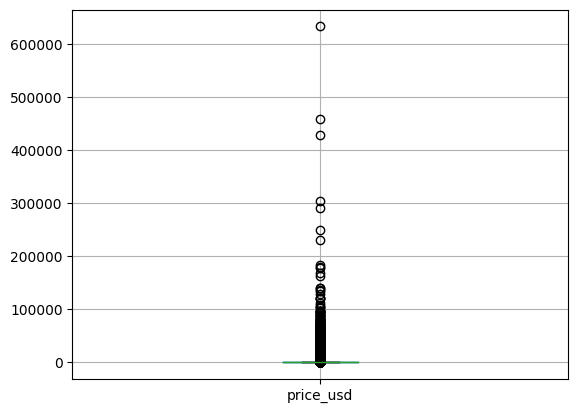

In [16]:
data[["price_usd"]].boxplot();

In [17]:
top_20_brands = data['brand_name'].value_counts().head(20).index
filtered_data = data[data['brand_name'].isin(top_20_brands)]
# Filter the DataFrame to include only the top 20 brands

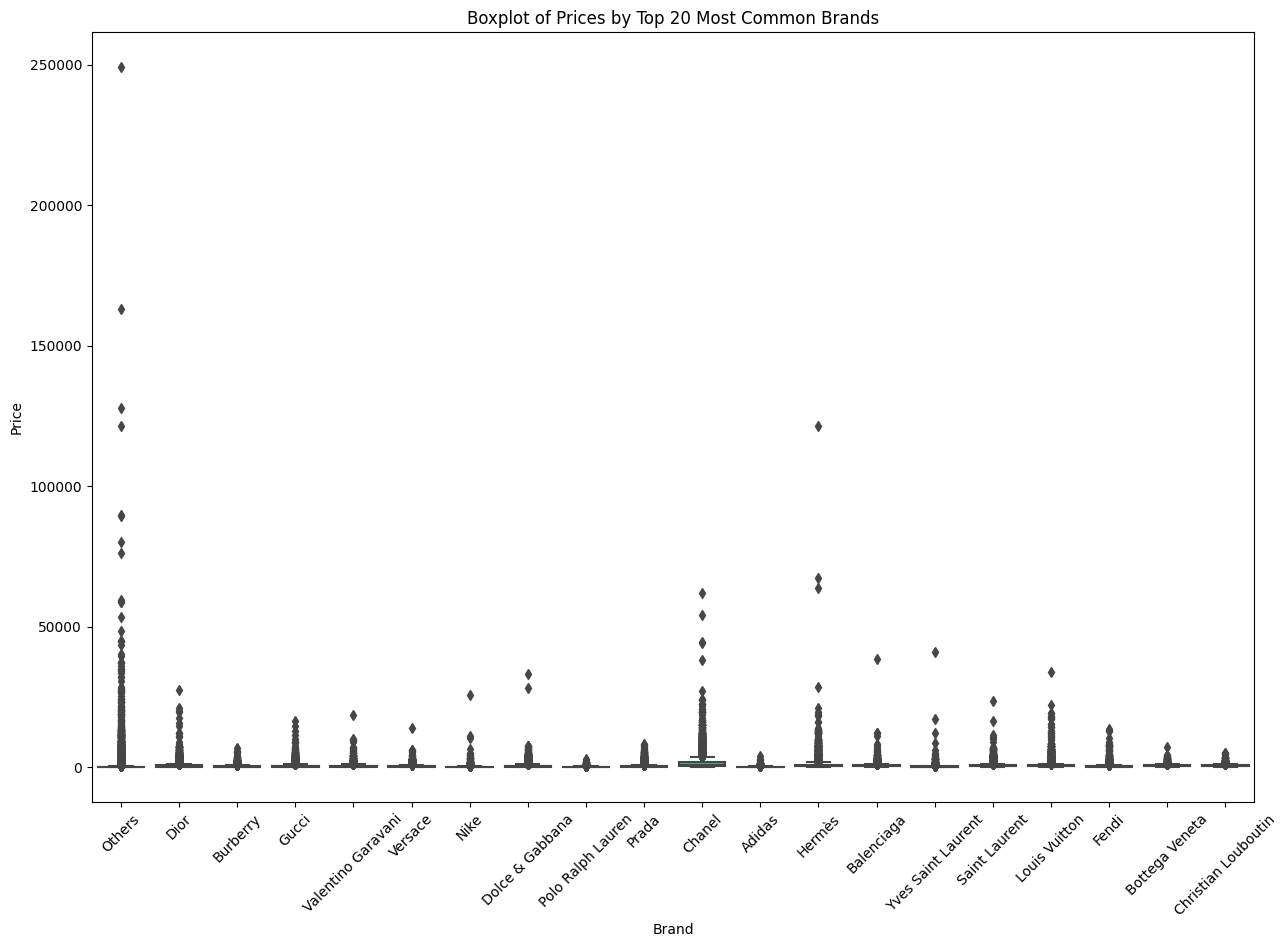

In [18]:


plt.figure(figsize=(15, 10))
sns.boxplot(x='brand_name', y='price_usd', data=filtered_data)
plt.xticks(rotation=45)
plt.title('Boxplot of Prices by Top 20 Most Common Brands')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show();

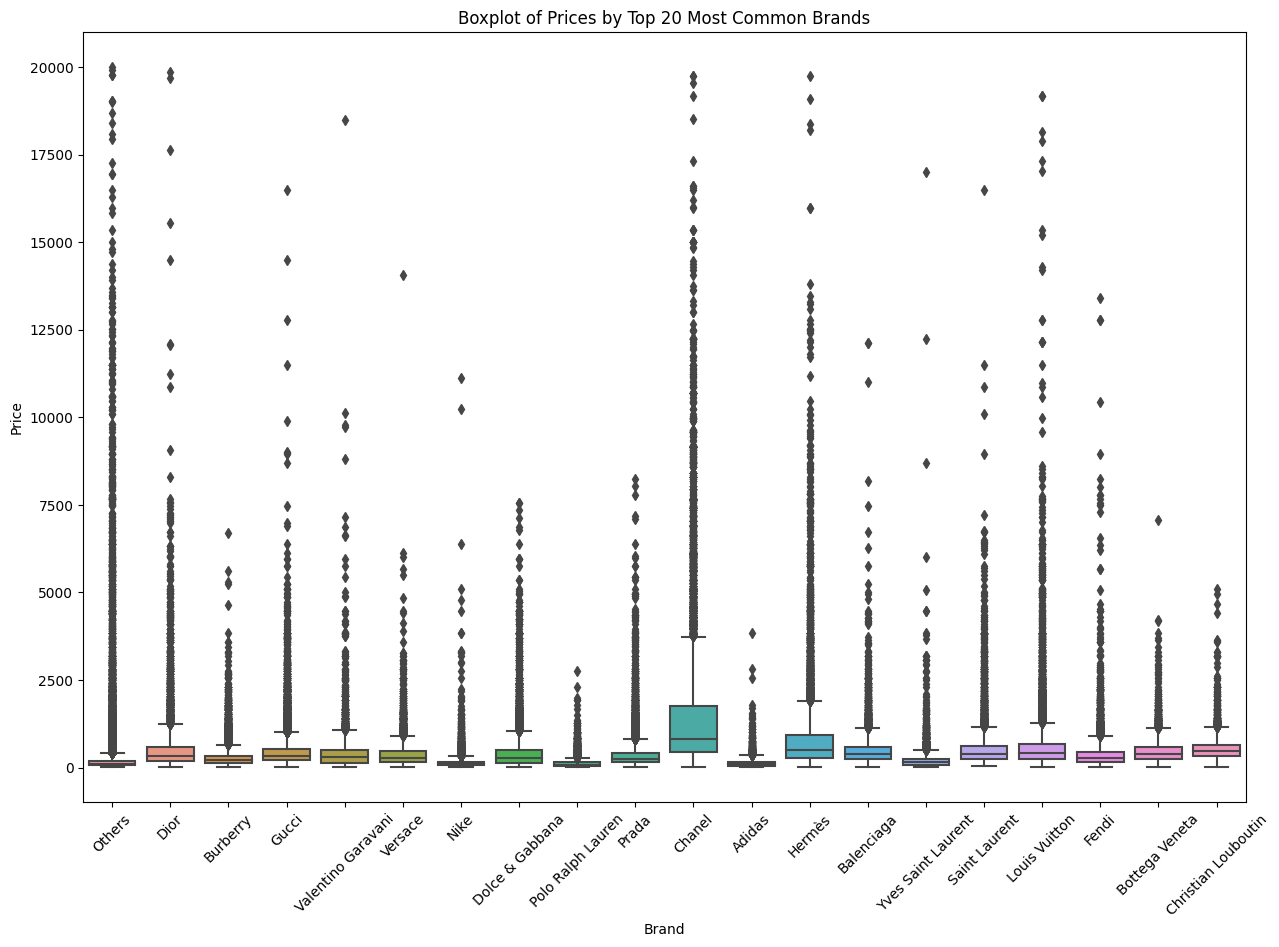

In [19]:
# Save the indexes corresponding to rows 
# without very high values (price < 200.000)
boolean_mask = (filtered_data['price_usd']<20000) 

# Apply the boolean filtering
filtered_data_boolean = filtered_data[boolean_mask].reset_index(drop=True)

# Visualize the boxplot again
plt.figure(figsize=(15, 10))
sns.boxplot(x='brand_name', y='price_usd', data=filtered_data_boolean)
plt.xticks(rotation=45)
plt.title('Boxplot of Prices by Top 20 Most Common Brands')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show();

## handling fees

In [20]:
data['buyers_fees'] = data['buyers_fees'].fillna(0)

In [21]:
data['has_cross_border_fees'] =  data['has_cross_border_fees'].fillna(False)

## Filling NA-values of usually_ships_within with most common value in brand

In [22]:
# Step 1: Calculate the overall most frequent value
overall_most_frequent_value = data['usually_ships_within'].mode()[0]

# Step 2: Define the imputation function
def impute_most_frequent(group):
    # Check if all values in the group are missing
    if group['usually_ships_within'].isnull().all():
        # Impute with the overall most frequent value
        group['usually_ships_within'] = overall_most_frequent_value
    else:
        imputer = SimpleImputer(strategy="most_frequent")
        # Reshape to 2D array because SimpleImputer expects it
        group_reshaped = group[['usually_ships_within']].values.reshape(-1, 1)
        imputed = imputer.fit_transform(group_reshaped)
        group['usually_ships_within'] = imputed.ravel()
    return group

# Step 3: Group by 'brand_name' and apply the imputation function
data = data.groupby('brand_name').apply(impute_most_frequent).reset_index(drop=True)



In [23]:
data['usually_ships_within'].value_counts()

1-2 days            700646
3-5 days            181839
6-7 days             16820
More than 7 days      1209
Name: usually_ships_within, dtype: int64

In [24]:
# Counting the NaN for each column
data.isnull().sum().sort_values(ascending=False)

product_category              1183
product_keywords              1183
seller_username                 39
product_description              7
product_material                 4
product_season                   2
product_color                    1
seller_community_rank            0
seller_num_products_listed       0
seller_products_sold             0
seller_price                     0
usually_ships_within             0
seller_num_followers             0
seller_id                        0
warehouse_name                   0
buyers_fees                      0
has_cross_border_fees            0
seller_badge                     0
seller_earning                   0
seller_country                   0
product_id                       0
price_usd                        0
product_type                     0
brand_url                        0
brand_name                       0
brand_id                         0
should_be_gone                   0
in_stock                         0
available           

## dropping rest of NA

In [25]:
data_cleaned = data.dropna()
data_cleaned.isnull().sum().sort_values(ascending=False)

product_id                    0
product_type                  0
price_usd                     0
seller_price                  0
seller_earning                0
seller_badge                  0
has_cross_border_fees         0
buyers_fees                   0
warehouse_name                0
seller_id                     0
seller_username               0
usually_ships_within          0
seller_country                0
seller_products_sold          0
seller_num_products_listed    0
seller_community_rank         0
seller_num_followers          0
product_color                 0
product_material              0
brand_url                     0
product_condition             0
product_name                  0
product_description           0
product_keywords              0
product_gender_target         0
product_category              0
product_season                0
product_like_count            0
brand_name                    0
sold                          0
reserved                      0
availabl

In [26]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899278 entries, 0 to 900513
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  899278 non-null  int64  
 1   product_type                899278 non-null  object 
 2   product_name                899278 non-null  object 
 3   product_description         899278 non-null  object 
 4   product_keywords            899278 non-null  object 
 5   product_gender_target       899278 non-null  object 
 6   product_category            899278 non-null  object 
 7   product_season              899278 non-null  object 
 8   product_condition           899278 non-null  object 
 9   product_like_count          899278 non-null  float64
 10  sold                        899278 non-null  bool   
 11  reserved                    899278 non-null  bool   
 12  available                   899278 non-null  bool   
 13  in_stock      

## Preprocessing

### Product_like_count
#### As it is very skewed and Outliers are important i used MinMAx

#### Feature Transformation/Engineering

If your feature is extremely skewed  
→
  consider Feature Engineering first (e.g. log(feature))
shell we do this?

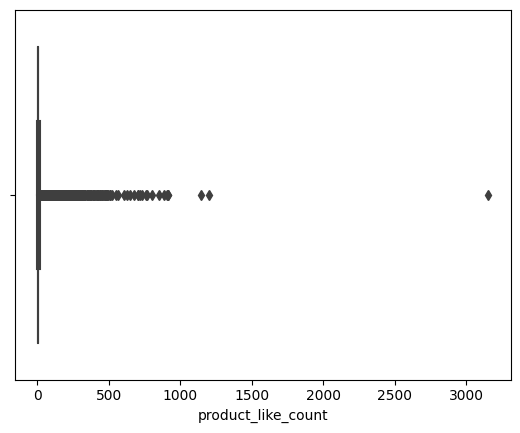

In [27]:
sns.boxplot(data=data_cleaned, x='product_like_count');
plt.show()

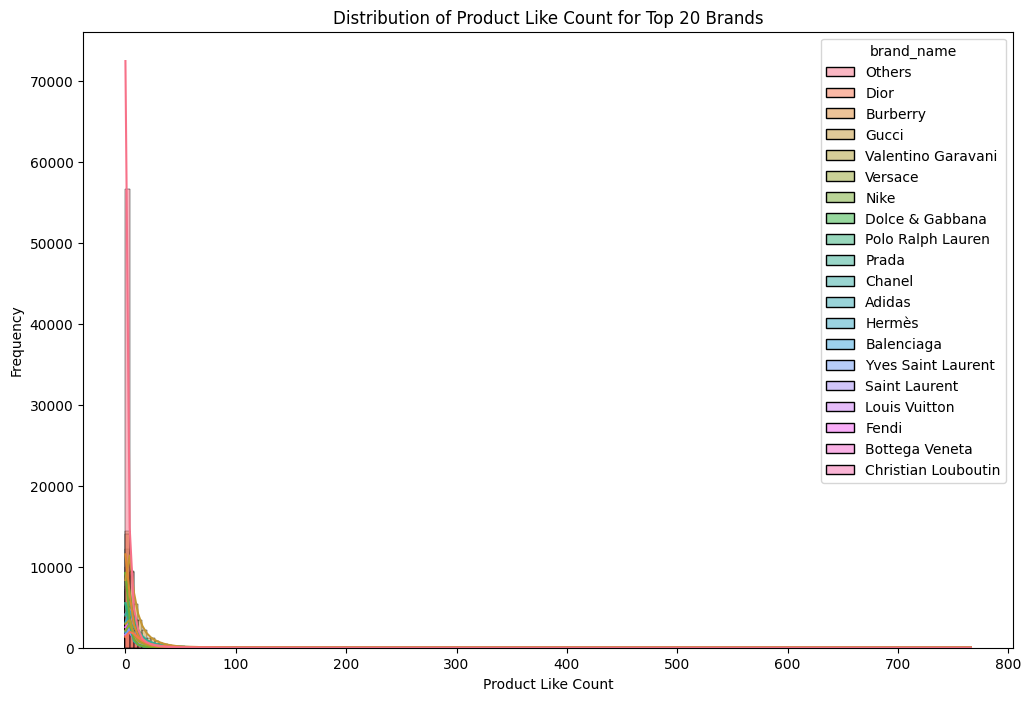

In [28]:
# Step 1: Identify the top 20 most common brands
top_brands = data_cleaned['brand_name'].value_counts().head(20).index

# Step 2: Filter the data to only include these top brands
filtered_data = data_cleaned[data_cleaned['brand_name'].isin(top_brands)]

# Step 3: Plot the histogram
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
likes_hist = sns.histplot(filtered_data, x='product_like_count', hue='brand_name', bins=200, kde=True)

# Add labels and title for clarity
plt.title('Distribution of Product Like Count for Top 20 Brands')
plt.xlabel('Product Like Count')
plt.ylabel('Frequency')

# Show the plot
plt.show();

In [29]:

# Make sure that brand_name is only a column and not an index
data_cleaned = data_cleaned.reset_index(drop=True)

# Function to apply RobustScaler to each group
def scale_group(group):
    mm_scaler = MinMaxScaler()
    group['product_like_count'] = mm_scaler.fit_transform(group[['product_like_count']])
    return group

# Apply the function to each group
# Using group_keys=False to avoid adding the group name back as an index level
data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(scale_group)


# Reset the index to ensure 'brand_name' is a column, not an index
data_cleaned = data_cleaned.reset_index(drop=True)


# Display the first few rows of the transformed data
data_cleaned.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,0.152466,...,Tourcoing,25775970,vitalii25775970,1-2 days,Germany,3.0,14.0,0.0,13.0,0.0
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,0.033333,...,Tourcoing,13698770,olivia13698770,1-2 days,Belgium,0.0,0.0,0.0,8.0,0.0
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,0.013245,...,Tourcoing,6042365,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,96.0
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.000000,...,Brooklyn,13172949,gretchen13172949,1-2 days,United States,63.0,274.0,126346.0,131.0,96.0
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,0.003049,...,Crawley,2578605,crunchykat,3-5 days,United Kingdom,19.0,14.0,102821.0,40.0,89.0


### Seller_products_sold

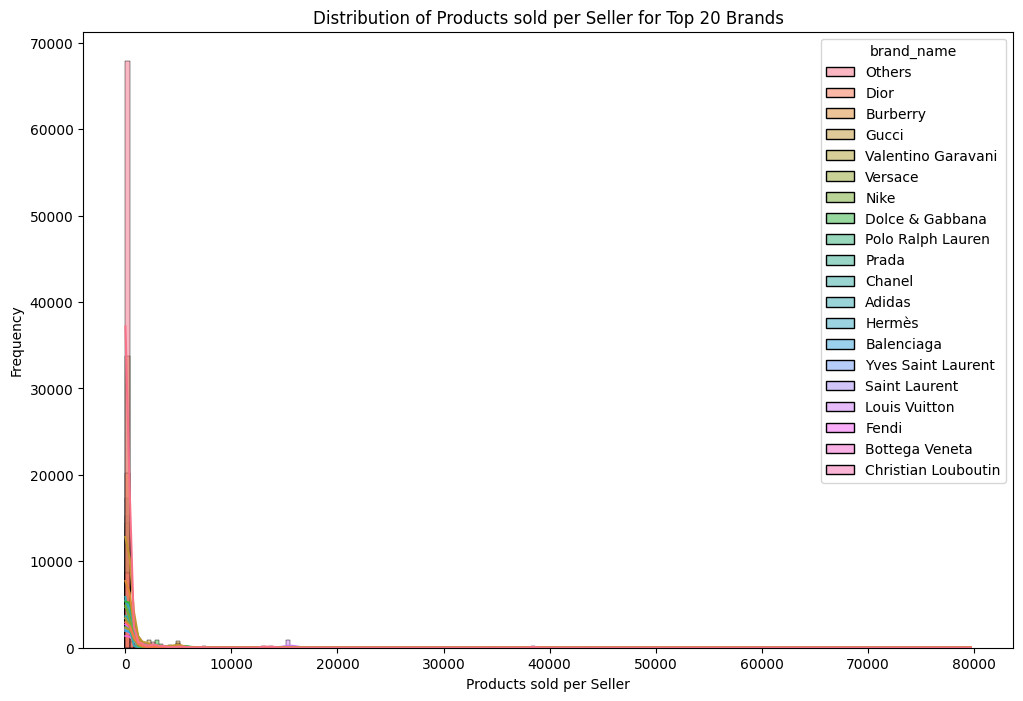

In [30]:
# Step 3: Plot the histogram
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
products_sold_hist = sns.histplot(filtered_data, x='seller_products_sold', hue='brand_name', bins=200, kde=True)

# Add labels and title for clarity
plt.title('Distribution of Products sold per Seller for Top 20 Brands')
plt.xlabel('Products sold per Seller')
plt.ylabel('Frequency')

# Show the plot
plt.show();

### Seller_num_products_listed 

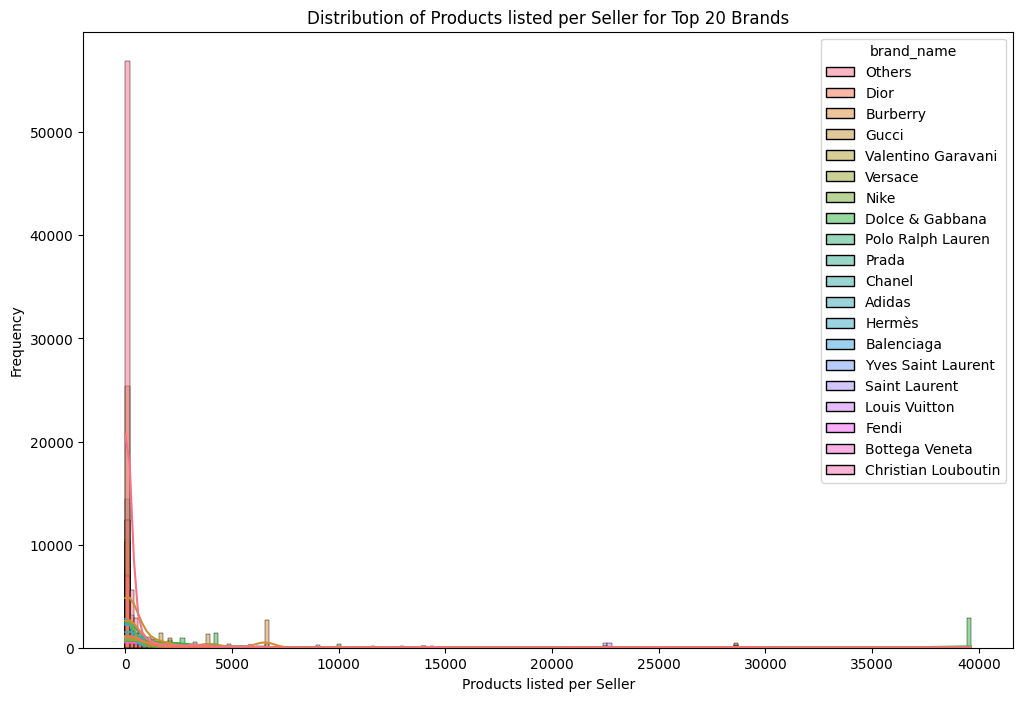

In [31]:
# Step 3: Plot the histogram
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
products_listed_hist = sns.histplot(filtered_data, x='seller_num_products_listed', hue='brand_name', bins=200, kde=True)

# Add labels and title for clarity
plt.title('Distribution of Products listed per Seller for Top 20 Brands')
plt.xlabel('Products listed per Seller')
plt.ylabel('Frequency')

# Show the plot
plt.show();

### Seller_community_rank

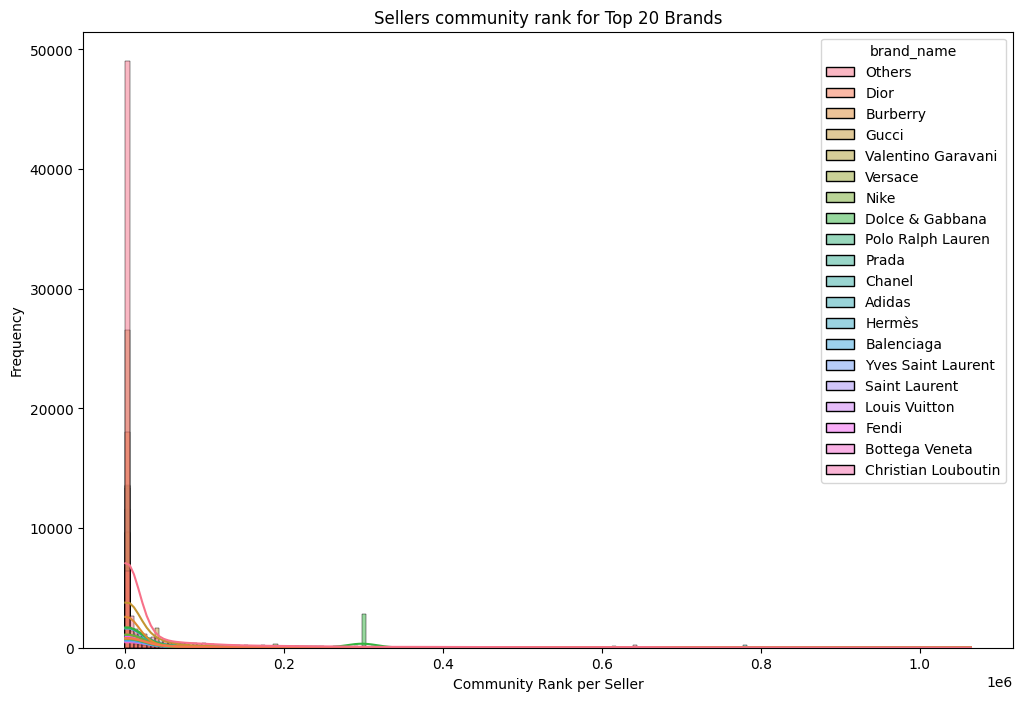

In [32]:
# Step 3: Plot the histogram
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
community_rank_hist = sns.histplot(filtered_data, x='seller_community_rank', hue='brand_name', bins=200, kde=True)

# Add labels and title for clarity
plt.title('Sellers community rank for Top 20 Brands')
plt.xlabel('Community Rank per Seller')
plt.ylabel('Frequency')

# Show the plot
plt.show();

### Seller_num_followers

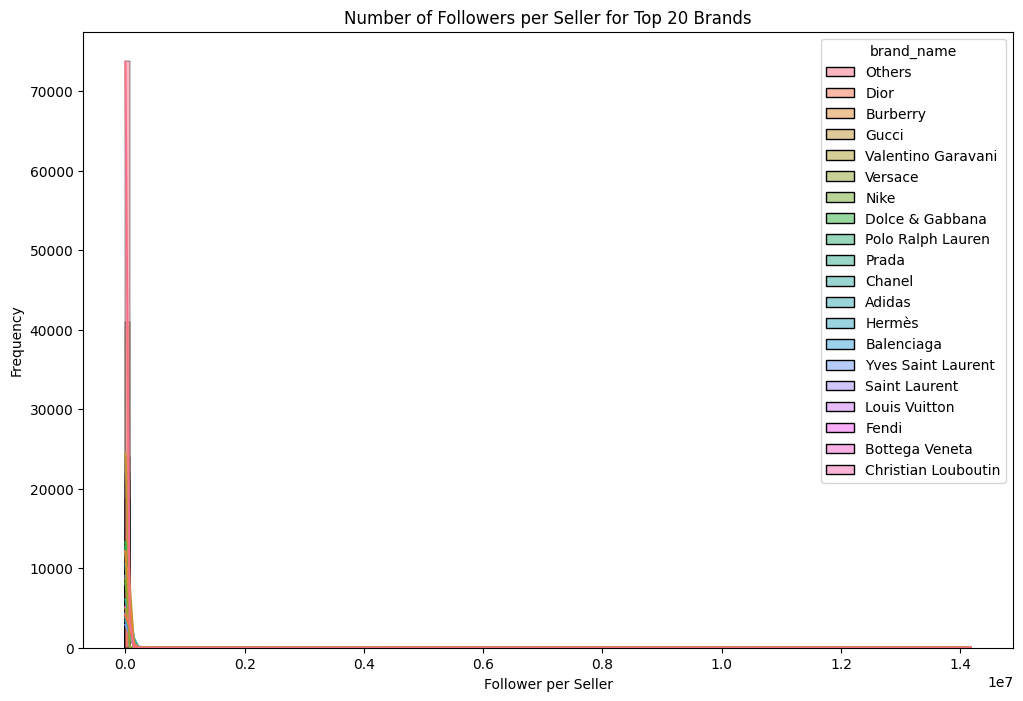

In [33]:
# Step 3: Plot the histogram
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
num_followers_hist = sns.histplot(filtered_data, x='seller_num_followers', hue='brand_name', bins=200, kde=True)

# Add labels and title for clarity
plt.title('Number of Followers per Seller for Top 20 Brands')
plt.xlabel('Follower per Seller')
plt.ylabel('Frequency')

# Show the plot
plt.show();

### Seller_pass_rate

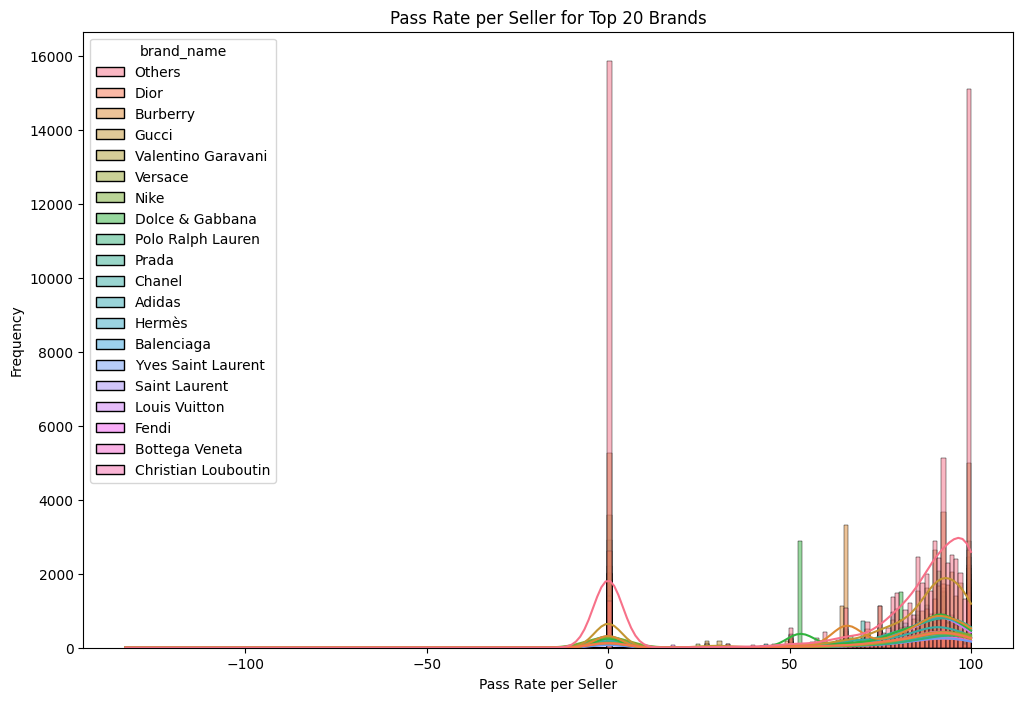

In [34]:
# Step 3: Plot the histogram
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
pass_rate_hist = sns.histplot(filtered_data, x='seller_pass_rate', hue='brand_name', bins=200, kde=True)

# Add labels and title for clarity
plt.title('Pass Rate per Seller for Top 20 Brands')
plt.xlabel('Pass Rate per Seller')
plt.ylabel('Frequency')

# Show the plot
plt.show();

In [35]:
def scale_group(group):
    mm_scaler = MinMaxScaler()
    group['seller_pass_rate'] = mm_scaler.fit_transform(group[['seller_pass_rate']])
    return group

# Apply the function to each group
# Using group_keys=False to avoid adding the group name back as an index level
data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(scale_group)


# Reset the index to ensure 'brand_name' is a column, not an index
data_cleaned = data_cleaned.reset_index(drop=True)


# Display the first few rows of the transformed data
data_cleaned.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,0.152466,...,Tourcoing,25775970,vitalii25775970,1-2 days,Germany,3.0,14.0,0.0,13.0,0.00
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,0.033333,...,Tourcoing,13698770,olivia13698770,1-2 days,Belgium,0.0,0.0,0.0,8.0,0.00
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,0.013245,...,Tourcoing,6042365,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,0.96
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.000000,...,Brooklyn,13172949,gretchen13172949,1-2 days,United States,63.0,274.0,126346.0,131.0,0.96
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,0.003049,...,Crawley,2578605,crunchykat,3-5 days,United Kingdom,19.0,14.0,102821.0,40.0,0.89


In [36]:
data_cleaned.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,0.152466,...,Tourcoing,25775970,vitalii25775970,1-2 days,Germany,3.0,14.0,0.0,13.0,0.00
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,0.033333,...,Tourcoing,13698770,olivia13698770,1-2 days,Belgium,0.0,0.0,0.0,8.0,0.00
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,0.013245,...,Tourcoing,6042365,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,0.96
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.000000,...,Brooklyn,13172949,gretchen13172949,1-2 days,United States,63.0,274.0,126346.0,131.0,0.96
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,0.003049,...,Crawley,2578605,crunchykat,3-5 days,United Kingdom,19.0,14.0,102821.0,40.0,0.89


### Product_gender_target

In [37]:
# Show the dataset
data_cleaned.head(3)

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,0.152466,...,Tourcoing,25775970,vitalii25775970,1-2 days,Germany,3.0,14.0,0.0,13.0,0.00
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,0.033333,...,Tourcoing,13698770,olivia13698770,1-2 days,Belgium,0.0,0.0,0.0,8.0,0.00
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,0.013245,...,Tourcoing,6042365,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,0.96


## Cluster Variables with huge amount of unique values

### brands_occurrence

In [38]:

# Create a DataFrame with brand names and their occurrences
brand_occurrences = data_cleaned['brand_name'].value_counts().reset_index()
brand_occurrences.columns = ['brand_name', 'occurrences']

# Display the occurrences
print("\nBrand Occurrences:")
brand_occurrences


Brand Occurrences:


,brand_name,occurrences
0,Others,73828
1,Gucci,41008
2,Burberry,24018
3,Dolce & Gabbana,22024
4,Prada,20972
...,...,...
1230,IZAC,61
1231,Barneys New York,30
1232,G-STAR RAW,25
1233,A.L.C,16


In [39]:
# Number of clusters
n_clusters = 20

# Initialize KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model using only the 'occurrences' column
brand_occurrences['brand_cluster'] = kmeans.fit_predict(brand_occurrences[['occurrences']])

# Calculate the min and max occurrences for each cluster
cluster_ranges = brand_occurrences.groupby('brand_cluster')['occurrences'].agg(['min', 'max']).reset_index()
cluster_ranges.columns = ['brand_cluster', 'min_occurrences', 'max_occurrences']

# Sort clusters by min_occurrences and reset cluster numbers
cluster_ranges = cluster_ranges.sort_values(by='min_occurrences').reset_index(drop=True)
cluster_ranges['new_cluster'] = range(1, n_clusters + 1)

# Merge the new cluster numbers back into brand_occurrences
brand_occurrences = brand_occurrences.merge(cluster_ranges[['brand_cluster', 'new_cluster']], on='brand_cluster')
brand_occurrences = brand_occurrences.drop(columns='brand_cluster').rename(columns={'new_cluster': 'brand_cluster'})



In [40]:
# Calculate the range of occurrences for each cluster
range_df = brand_occurrences.groupby('brand_cluster').agg(
    min_occurrences=('occurrences', 'min'),
    max_occurrences=('occurrences', 'max'),
    brands_in_cluster=('brand_name', 'size')  # Count the number of brands in each cluster
).reset_index()

# Display the range for each cluster
print("\nRange of Occurrences by Cluster:")
range_df.sort_values(by='min_occurrences')


Range of Occurrences by Cluster:


,brand_cluster,min_occurrences,max_occurrences,brands_in_cluster
0,1,10,180,662
1,2,181,368,240
2,3,370,602,113
3,4,604,853,58
4,5,866,1148,35
5,6,1250,1631,24
6,7,1687,2235,27
7,8,2257,2904,21
8,9,3089,3830,16
9,10,4100,5051,12


In [41]:
# Merge the updated cluster information back into data_cleaned
data_cleaned = data_cleaned.merge(brand_occurrences[['brand_name', 'brand_cluster']], on='brand_name', how='left')

# Display the first few rows of the updated data_cleaned
print("\nUpdated data_cleaned with occurrences_cluster:")
data_cleaned.head()


Updated data_cleaned with occurrences_cluster:


,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate,brand_cluster
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,0.152466,...,25775970,vitalii25775970,1-2 days,Germany,3.0,14.0,0.0,13.0,0.00,10
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,0.033333,...,13698770,olivia13698770,1-2 days,Belgium,0.0,0.0,0.0,8.0,0.00,2
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,0.013245,...,6042365,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,0.96,9
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.000000,...,13172949,gretchen13172949,1-2 days,United States,63.0,274.0,126346.0,131.0,0.96,3
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,0.003049,...,2578605,crunchykat,3-5 days,United Kingdom,19.0,14.0,102821.0,40.0,0.89,20


### seller_products_sold

In [42]:
# Step 1: Create a DataFrame with seller_products_sold and their occurrences
products_sold = data_cleaned[['seller_products_sold']].dropna().copy()
products_sold['occurrences'] = products_sold.groupby('seller_products_sold')['seller_products_sold'].transform('count')

# Remove duplicates to prepare for clustering
unique_products_sold = products_sold.drop_duplicates()

# Number of clusters
n_clusters = 20

# Initialize and fit the KMeans model
scaler = MinMaxScaler()
unique_products_sold['scaled_seller_products_sold'] = scaler.fit_transform(unique_products_sold[['seller_products_sold']])
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
unique_products_sold['cluster'] = kmeans.fit_predict(unique_products_sold[['scaled_seller_products_sold']])

# Step 2: Calculate min and max seller_products_sold for each cluster
cluster_ranges = unique_products_sold.groupby('cluster')['seller_products_sold'].agg(['min', 'max']).reset_index()
cluster_ranges.columns = ['cluster', 'min_seller_products_sold', 'max_seller_products_sold']

# Step 3: Sort clusters by min_seller_products_sold and reset cluster numbers
cluster_ranges = cluster_ranges.sort_values(by='min_seller_products_sold').reset_index(drop=True)
cluster_ranges['new_cluster'] = range(1, n_clusters + 1)

# Step 4: Merge the new cluster numbers back into unique_products_sold
unique_products_sold = unique_products_sold.merge(cluster_ranges[['cluster', 'new_cluster']], on='cluster')
unique_products_sold = unique_products_sold.drop(columns='cluster').rename(columns={'new_cluster': 'products_sold_cluster'})

# Step 5: Merge the clusters back into the original DataFrame
data_cleaned = data_cleaned.merge(unique_products_sold[['seller_products_sold', 'products_sold_cluster']], on='seller_products_sold', how='left')

# Display updated DataFrame
print(data_cleaned.head())

/tmp/ipykernel_211205/288485295.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_products_sold['scaled_seller_products_sold'] = scaler.fit_transform(unique_products_sold[['seller_products_sold']])
/tmp/ipykernel_211205/288485295.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_products_sold['cluster'] = kmeans.fit_predict(unique_products_sold[['scaled_seller_products_sold']])


   product_id            product_type  \
0    43247626         Wool mini skirt   
1    43247441                  Jacket   
2    43246517               Wool coat   
3    43246507              Mini skirt   
4    43246417  Vegan leather trousers   

                                        product_name  \
0  Wool mini skirt Miu Miu Grey size S Internatio...   
1      Jacket Barbara Bui Navy size 42 FR in Cotton    
2  Wool coat Comme Des Garcons White size S Inter...   
3     Mini skirt MSGM Black size 38 IT in Polyester    
4  Vegan leather trousers LVIR Black size 36 FR i...   

                                 product_description  \
0  Miu Miu – Pleated mini skirt Size: 36 (S)  Wai...   
1  For selling nice women's suit Barbara Bui size...   
2  Magnificent boiled wool coat. I bought it in t...   
3  MSGM Skirt Black Printed Raw-Edge & Embroidere...   
4  LVIR black grained faux leather trousers size ...   

               product_keywords product_gender_target product_category  \
0    

In [43]:
print("\nRange of Products Sold by Cluster:")
print(cluster_ranges[['new_cluster', 'min_seller_products_sold', 'max_seller_products_sold']])


Range of Products Sold by Cluster:
    new_cluster  min_seller_products_sold  max_seller_products_sold
0             1                       0.0                     224.0
1             2                     225.0                     466.0
2             3                     467.0                     724.0
3             4                     725.0                     994.0
4             5                     995.0                    1304.0
5             6                    1312.0                    1723.0
6             7                    1739.0                    2293.0
7             8                    2316.0                    3185.0
8             9                    3196.0                    4289.0
9            10                    4424.0                    5270.0
10           11                    5386.0                    6311.0
11           12                    7217.0                    7303.0
12           13                    8711.0                    8719.0
13          

### seller_num_products_listed

In [44]:
# Step 1: Prepare the DataFrame
num_products_listed = data_cleaned[['seller_num_products_listed']].dropna().copy()

# Number of clusters
n_clusters = 20

# Initialize and fit the KMeans model
scaler = MinMaxScaler()
num_products_listed['scaled_num_products_listed'] = scaler.fit_transform(num_products_listed[['seller_num_products_listed']])
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
num_products_listed['cluster'] = kmeans.fit_predict(num_products_listed[['scaled_num_products_listed']])

# Step 2: Calculate min and max values for each cluster
cluster_ranges = num_products_listed.groupby('cluster')['seller_num_products_listed'].agg(['min', 'max']).reset_index()
cluster_ranges.columns = ['cluster', 'min_num_products_listed', 'max_num_products_listed']

# Step 3: Sort clusters by min_num_products_listed and reset cluster numbers
cluster_ranges = cluster_ranges.sort_values(by='min_num_products_listed').reset_index(drop=True)
cluster_ranges['new_cluster'] = range(1, n_clusters + 1)

# Step 4: Merge the new cluster numbers back into num_products_listed
num_products_listed = num_products_listed.merge(cluster_ranges[['cluster', 'new_cluster']], on='cluster')
num_products_listed = num_products_listed.drop(columns='cluster').rename(columns={'new_cluster': 'num_products_listed_cluster'})

# Step 5: Merge the clusters back into the original DataFrame
# Reset index to avoid large memory allocations
data_cleaned = data_cleaned.reset_index()
num_products_listed = num_products_listed.reset_index()

# Merge using index
data_cleaned = data_cleaned.merge(num_products_listed[['index', 'num_products_listed_cluster']], left_index=True, right_on='index', how='left')

# Drop the temporary 'index' column used for merging
data_cleaned = data_cleaned.drop(columns=['index'])

# Display updated DataFrame
print(data_cleaned.head())

   index_x  product_id            product_type  \
0        0    43247626         Wool mini skirt   
1        1    43247441                  Jacket   
2        2    43246517               Wool coat   
3        3    43246507              Mini skirt   
4        4    43246417  Vegan leather trousers   

                                        product_name  \
0  Wool mini skirt Miu Miu Grey size S Internatio...   
1      Jacket Barbara Bui Navy size 42 FR in Cotton    
2  Wool coat Comme Des Garcons White size S Inter...   
3     Mini skirt MSGM Black size 38 IT in Polyester    
4  Vegan leather trousers LVIR Black size 36 FR i...   

                                 product_description  \
0  Miu Miu – Pleated mini skirt Size: 36 (S)  Wai...   
1  For selling nice women's suit Barbara Bui size...   
2  Magnificent boiled wool coat. I bought it in t...   
3  MSGM Skirt Black Printed Raw-Edge & Embroidere...   
4  LVIR black grained faux leather trousers size ...   

               product_ke

In [45]:
print("\nRange of Seller Number of Products Listed by Cluster:")
print(cluster_ranges[['new_cluster', 'min_num_products_listed', 'max_num_products_listed']])


Range of Seller Number of Products Listed by Cluster:
    new_cluster  min_num_products_listed  max_num_products_listed
0             1                      0.0                     95.0
1             2                     96.0                    282.0
2             3                    283.0                    562.0
3             4                    563.0                    956.0
4             5                    958.0                   1471.0
5             6                   1484.0                   2074.0
6             7                   2089.0                   2829.0
7             8                   2882.0                   3768.0
8             9                   3802.0                   4814.0
9            10                   5292.0                   5921.0
10           11                   6315.0                   7793.0
11           12                   8792.0                   9940.0
12           13                  11489.0                  11721.0
13           14      

### seller_community_rank

In [46]:

# Step 1: Prepare the DataFrame
community_rank = data_cleaned[['seller_community_rank']].dropna().copy()

# Number of clusters
n_clusters = 20

# Initialize and fit the KMeans model
scaler = MinMaxScaler()
community_rank['scaled_community_rank'] = scaler.fit_transform(community_rank[['seller_community_rank']])
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
community_rank['cluster'] = kmeans.fit_predict(community_rank[['scaled_community_rank']])

# Step 2: Calculate min and max values for each cluster
cluster_ranges = community_rank.groupby('cluster')['seller_community_rank'].agg(['min', 'max']).reset_index()
cluster_ranges.columns = ['cluster', 'min_community_rank', 'max_community_rank']

# Step 3: Sort clusters by min_community_rank and reset cluster numbers
cluster_ranges = cluster_ranges.sort_values(by='min_community_rank').reset_index(drop=True)
cluster_ranges['new_cluster'] = range(1, n_clusters + 1)

# Step 4: Merge the new cluster numbers back into community_rank
community_rank = community_rank.merge(cluster_ranges[['cluster', 'new_cluster']], on='cluster')
community_rank = community_rank.drop(columns='cluster').rename(columns={'new_cluster': 'community_rank_cluster'})

# Step 5: Merge the clusters back into the original DataFrame
# First, ensure that there are no index conflicts
data_cleaned = data_cleaned.reset_index(drop=True)
community_rank = community_rank.reset_index(drop=True)

# Drop duplicates to prepare for merging
unique_community_rank = community_rank[['seller_community_rank', 'community_rank_cluster']].drop_duplicates()

# Merge using the unique community_rank DataFrame
data_cleaned = data_cleaned.merge(unique_community_rank, on='seller_community_rank', how='left')

# Display updated DataFrame
print(data_cleaned.head())

   index_x  product_id            product_type  \
0        0    43247626         Wool mini skirt   
1        1    43247441                  Jacket   
2        2    43246517               Wool coat   
3        3    43246507              Mini skirt   
4        4    43246417  Vegan leather trousers   

                                        product_name  \
0  Wool mini skirt Miu Miu Grey size S Internatio...   
1      Jacket Barbara Bui Navy size 42 FR in Cotton    
2  Wool coat Comme Des Garcons White size S Inter...   
3     Mini skirt MSGM Black size 38 IT in Polyester    
4  Vegan leather trousers LVIR Black size 36 FR i...   

                                 product_description  \
0  Miu Miu – Pleated mini skirt Size: 36 (S)  Wai...   
1  For selling nice women's suit Barbara Bui size...   
2  Magnificent boiled wool coat. I bought it in t...   
3  MSGM Skirt Black Printed Raw-Edge & Embroidere...   
4  LVIR black grained faux leather trousers size ...   

               product_ke

In [47]:
# Optional: Print the range of values by cluster
print("\nRange of Seller Community Rank by Cluster:")
print(cluster_ranges[['new_cluster', 'min_community_rank', 'max_community_rank']])


Range of Seller Community Rank by Cluster:
    new_cluster  min_community_rank  max_community_rank
0             1                 0.0              5833.0
1             2              5836.0             19595.0
2             3             19596.0             37772.0
3             4             37779.0             61284.0
4             5             61285.0             89923.0
5             6             89928.0            122706.0
6             7            122717.0            160469.0
7             8            160479.0            198521.0
8             9            198530.0            236678.0
9            10            236718.0            278237.0
10           11            278259.0            327309.0
11           12            327340.0            386667.0
12           13            386714.0            450110.0
13           14            450162.0            514831.0
14           15            514876.0            580765.0
15           16            580853.0            643302.0
16  

### seller_num_followers

In [48]:
# Step 1: Prepare the DataFrame
num_followers = data_cleaned[['seller_num_followers']].dropna().copy()

# Number of clusters
n_clusters = 20

# Initialize and fit the KMeans model
scaler = MinMaxScaler()
num_followers['scaled_num_followers'] = scaler.fit_transform(num_followers[['seller_num_followers']])
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
num_followers['cluster'] = kmeans.fit_predict(num_followers[['scaled_num_followers']])

# Step 2: Calculate min and max values for each cluster
cluster_ranges = num_followers.groupby('cluster')['seller_num_followers'].agg(['min', 'max']).reset_index()
cluster_ranges.columns = ['cluster', 'min_num_followers', 'max_num_followers']

# Step 3: Sort clusters by min_num_followers and reset cluster numbers
cluster_ranges = cluster_ranges.sort_values(by='min_num_followers').reset_index(drop=True)
cluster_ranges['new_cluster'] = range(1, n_clusters + 1)

# Step 4: Merge the new cluster numbers back into num_followers
num_followers = num_followers.merge(cluster_ranges[['cluster', 'new_cluster']], on='cluster')
num_followers = num_followers.drop(columns='cluster').rename(columns={'new_cluster': 'num_followers_cluster'})

# Convert columns to appropriate types to save memory
num_followers['num_followers_cluster'] = num_followers['num_followers_cluster'].astype('int8')
data_cleaned['seller_num_followers'] = data_cleaned['seller_num_followers'].astype('int32')

# Drop unnecessary columns before merging to save memory
num_followers.drop_duplicates(inplace=True)

# Step 5: Merge the clusters back into the original DataFrame
data_cleaned = data_cleaned.merge(num_followers[['seller_num_followers', 'num_followers_cluster']], 
                                   on='seller_num_followers', how='left')

# Drop any potential duplicate index columns
data_cleaned = data_cleaned.loc[:,~data_cleaned.columns.duplicated()]

# Display updated DataFrame
print(data_cleaned.head())

   index_x  product_id            product_type  \
0        0    43247626         Wool mini skirt   
1        1    43247441                  Jacket   
2        2    43246517               Wool coat   
3        3    43246507              Mini skirt   
4        4    43246417  Vegan leather trousers   

                                        product_name  \
0  Wool mini skirt Miu Miu Grey size S Internatio...   
1      Jacket Barbara Bui Navy size 42 FR in Cotton    
2  Wool coat Comme Des Garcons White size S Inter...   
3     Mini skirt MSGM Black size 38 IT in Polyester    
4  Vegan leather trousers LVIR Black size 36 FR i...   

                                 product_description  \
0  Miu Miu – Pleated mini skirt Size: 36 (S)  Wai...   
1  For selling nice women's suit Barbara Bui size...   
2  Magnificent boiled wool coat. I bought it in t...   
3  MSGM Skirt Black Printed Raw-Edge & Embroidere...   
4  LVIR black grained faux leather trousers size ...   

               product_ke

In [49]:
# Optional: Print the range of values by cluster
print("\nRange of Seller Number of Followers by Cluster:")
print(cluster_ranges[['new_cluster', 'min_num_followers', 'max_num_followers']])


Range of Seller Number of Followers by Cluster:
    new_cluster  min_num_followers  max_num_followers
0             1                0.0              266.0
1             2              267.0              787.0
2             3              788.0             1780.0
3             4             1783.0             2934.0
4             5             2964.0             4120.0
5             6             4127.0             5698.0
6             7             5736.0             7356.0
7             8             7398.0             8960.0
8             9             9047.0            10958.0
9            10            11038.0            12933.0
10           11            13448.0            15216.0
11           12            15669.0            17404.0
12           13            18678.0            22093.0
13           14            25964.0            26729.0
14           15            28824.0            35276.0
15           16            38921.0            43243.0
16           17           585583.

In [50]:
data_cleaned.head()

,index_x,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,...,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate,brand_cluster,products_sold_cluster,index_y,num_products_listed_cluster,community_rank_cluster,num_followers_cluster
0,0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,...,14.0,0.0,13,0.00,10,1,0,1,1,1
1,1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,...,0.0,0.0,8,0.00,2,1,1,1,1,1
2,2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,...,69.0,0.0,62,0.96,9,1,2,1,1,1
3,3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,...,274.0,126346.0,131,0.96,3,1,3,1,7,1
4,4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,...,14.0,102821.0,40,0.89,20,1,4,1,6,1


In [51]:
data_dropped = data_cleaned.drop(columns=['index_y', 'index_x', 'product_id','seller_products_sold','seller_num_products_listed', 'product_name', 'product_description', 'product_keywords','brand_id', 'brand_name', 'brand_url', 'seller_price', 'seller_earning', 'seller_id', 'seller_username', 'seller_community_rank', 'seller_num_followers', 'buyers_fees', 'products_sold_cluster', 'sold', 'in_stock', 'should_be_gone', 'reserved', 'available'])
data_dropped.head()

,product_type,product_gender_target,product_category,product_season,product_condition,product_like_count,product_material,product_color,price_usd,seller_badge,has_cross_border_fees,warehouse_name,usually_ships_within,seller_country,seller_pass_rate,brand_cluster,num_products_listed_cluster,community_rank_cluster,num_followers_cluster
0,Wool mini skirt,Women,Women Clothing,Autumn / Winter,Never worn,0.152466,Wool,Grey,272.92,Common,False,Tourcoing,1-2 days,Germany,0.00,10,1,1,1
1,Jacket,Women,Women Clothing,All seasons,Very good condition,0.033333,Cotton,Navy,127.80,Common,True,Tourcoing,1-2 days,Belgium,0.00,2,1,1,1
2,Wool coat,Women,Women Clothing,Autumn / Winter,Very good condition,0.013245,Wool,White,1278.00,Expert,True,Tourcoing,1-2 days,Spain,0.96,9,1,1,1
3,Mini skirt,Women,Women Clothing,All seasons,Very good condition,0.000000,Polyester,Black,163.90,Expert,True,Brooklyn,1-2 days,United States,0.96,3,1,7,1
4,Vegan leather trousers,Women,Women Clothing,All seasons,Very good condition,0.003049,Vegan leather,Black,119.72,Common,True,Crawley,3-5 days,United Kingdom,0.89,20,1,6,1


### Preprocess the categorical data

In [76]:
cat_features = data_dropped.select_dtypes(include=['object']).columns
bool_features = data_dropped.select_dtypes(include=['bool']).columns
num_features = data_dropped.select_dtypes(include=['number']).columns

Index(['product_like_count', 'seller_pass_rate', 'brand_cluster',
       'num_products_listed_cluster', 'community_rank_cluster',
       'num_followers_cluster'],
      dtype='object')

In [78]:
num_features = [feature for feature in num_features if feature != 'price_usd']

In [73]:
X = data_dropped.drop(columns=['price_usd'])
y = data_dropped['price_usd']

In [74]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899278 entries, 0 to 899277
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   product_type                 899278 non-null  object 
 1   product_gender_target        899278 non-null  object 
 2   product_category             899278 non-null  object 
 3   product_season               899278 non-null  object 
 4   product_condition            899278 non-null  object 
 5   product_like_count           899278 non-null  float64
 6   product_material             899278 non-null  object 
 7   product_color                899278 non-null  object 
 8   seller_badge                 899278 non-null  object 
 9   has_cross_border_fees        899278 non-null  bool   
 10  warehouse_name               899278 non-null  object 
 11  usually_ships_within         899278 non-null  object 
 12  seller_country               899278 non-null  object 
 13 

In [79]:
num_features

['product_like_count',
 'seller_pass_rate',
 'brand_cluster',
 'num_products_listed_cluster',
 'community_rank_cluster',
 'num_followers_cluster']

In [80]:
sample_fraction = 0.01
X_sampled = X.sample(frac=sample_fraction, random_state=42)
y_sampled = y.loc[X_sampled.index]

In [81]:
X_sampled = X_sampled.copy()
for col in ['product_like_count', 'seller_pass_rate']:
    X_sampled[col] = X_sampled[col].astype('float32')
for col in ['brand_cluster', 'num_products_listed_cluster', 'community_rank_cluster', 'num_followers_cluster']:
    X_sampled[col] = X_sampled[col].astype('int32')

In [82]:
X_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8993 entries, 297235 to 441
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_type                 8993 non-null   object 
 1   product_gender_target        8993 non-null   object 
 2   product_category             8993 non-null   object 
 3   product_season               8993 non-null   object 
 4   product_condition            8993 non-null   object 
 5   product_like_count           8993 non-null   float32
 6   product_material             8993 non-null   object 
 7   product_color                8993 non-null   object 
 8   seller_badge                 8993 non-null   object 
 9   has_cross_border_fees        8993 non-null   bool   
 10  warehouse_name               8993 non-null   object 
 11  usually_ships_within         8993 non-null   object 
 12  seller_country               8993 non-null   object 
 13  seller_pass_ra

In [124]:
# Define preprocessing for categorical data
categorical_transformer = ce.TargetEncoder(cols=cat_features, smoothing=0.2)

# Define preprocessing for boolean data
boolean_transformer = ce.BinaryEncoder(cols=bool_features) 

numerical_transformer = 'passthrough'
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_features),
        ('bool', boolean_transformer, bool_features),
        ('num', numerical_transformer, num_features)  # Apply passthrough to numerical features
    ])

## Observing the Correlartion

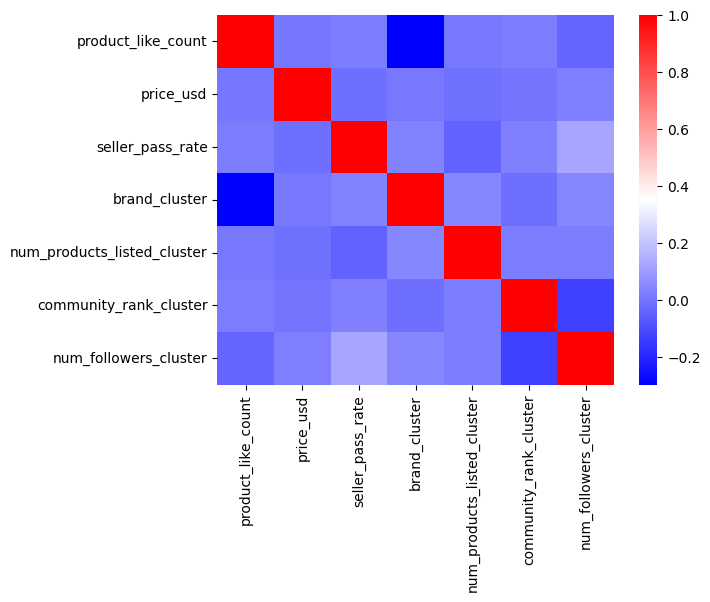

In [84]:
%matplotlib inline

# Standard import for matplotlib


# Your plotting code
correlation_matrix = data_dropped.select_dtypes('number').corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names, cmap="bwr")

# Make sure to show the plot
plt.show();

In [85]:
# Convert the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Rename the columns
corr_df.columns = ['feature_1', 'feature_2', 'correlation']

# Remove self correlations
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

# Create a unique identifier for each pair (sorted to ensure uniqueness)
corr_df['pair'] = np.where(corr_df['feature_1'] < corr_df['feature_2'],
                           corr_df['feature_1'] + '-' + corr_df['feature_2'],
                           corr_df['feature_2'] + '-' + corr_df['feature_1'])

# Drop duplicate pairs
corr_df_unique = corr_df.drop_duplicates(subset='pair', keep='first')

# Compute the absolute correlation using .loc to avoid SettingWithCopyWarning
corr_df_unique.loc[:, 'absolute_correlation'] = np.abs(corr_df_unique['correlation'])

# Sort by absolute correlation and show top pairs
top_corr_pairs = corr_df_unique.sort_values(by="absolute_correlation", ascending=False)
# Display the result
pd.set_option('display.max_rows', None)  
display(top_corr_pairs)

/tmp/ipykernel_211205/2365905297.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df_unique.loc[:, 'absolute_correlation'] = np.abs(corr_df_unique['correlation'])


,feature_1,feature_2,correlation,pair,absolute_correlation
3,product_like_count,brand_cluster,-0.298070,brand_cluster-product_like_count,0.298070
41,community_rank_cluster,num_followers_cluster,-0.132778,community_rank_cluster-num_followers_cluster,0.132778
20,seller_pass_rate,num_followers_cluster,0.126371,num_followers_cluster-seller_pass_rate,0.126371
18,seller_pass_rate,num_products_listed_cluster,-0.046576,num_products_listed_cluster-seller_pass_rate,0.046576
27,brand_cluster,num_followers_cluster,0.045506,brand_cluster-num_followers_cluster,0.045506
25,brand_cluster,num_products_listed_cluster,0.043159,brand_cluster-num_products_listed_cluster,0.043159
6,product_like_count,num_followers_cluster,-0.040258,num_followers_cluster-product_like_count,0.040258
17,seller_pass_rate,brand_cluster,0.032772,brand_cluster-seller_pass_rate,0.032772
19,seller_pass_rate,community_rank_cluster,0.027068,community_rank_cluster-seller_pass_rate,0.027068
13,price_usd,num_followers_cluster,0.023748,num_followers_cluster-price_usd,0.023748


# Modeling

In [125]:
# Create a pipeline that preprocesses the data and then applies a model

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [126]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42)

In [127]:
# Train the model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  TargetEncoder(cols=Index(['product_type', 'product_gender_target', 'product_category',
       'product_season', 'product_condition', 'product_material',
       'product_color', 'seller_badge', 'warehouse_name',
       'usually_ships_within', 'seller_country'],
      dtype='object'),
                                                                smoothing=0.2),
                                                  Index(['product_typ...
      dtype='object')),
                                                 ('bool',
                                                  BinaryEncoder(cols=Index(['has_cross_border_fees'], dtype='object')),
                                                  Index(['has_cross_border_fees'], dtype='object')),
                                                 ('num', 'passthrough',
                                                  ['product_like_count',
                                                   'seller_pass_rate',
                                                   'brand_cluster',
                                                   'num_products_listed_cluster',
                                                   'community_rank_cluster',
                                                   'num_followers_cluster'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [128]:
# Evaluate the model
r2 = model_pipeline.score(X_test, y_test)
print(f"R^2 score: {r2}")

R^2 score: -1.460206327375881


In [129]:
# Simpler model
model = Ridge()

# Create a pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")

R^2 score: 0.10273709037744394


In [131]:
target_encoder = ce.TargetEncoder(cols=cat_features, smoothing=0.2)
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Fit the encoder on the training data and transform
X_train_encoded[cat_features] = target_encoder.fit_transform(X_train[cat_features], y_train)
X_test_encoded[cat_features] = target_encoder.transform(X_test[cat_features])

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Update model in pipeline
model_pipeline.set_params(model=RandomForestRegressor(random_state=42))

# Define the grid of hyperparameters
param_grid = {
    'model__n_estimators': [100, 200, 300, 400, 500, 600],
    'model__max_depth': [None, 10, 20, 30, 40, 50],
    'model__min_samples_split': [2, 5, 10, 15, 20],
    'model__min_samples_leaf': [1, 2, 4, 6, 8]
}

# Grid Search
grid_search = GridSearchCV(model_pipeline, param_grid, cv=3, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters and model evaluation
print(f"Best parameters found: {grid_search.best_params_}")
y_pred = grid_search.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")

Best parameters found: {'model__max_depth': 10, 'model__min_samples_leaf': 6, 'model__min_samples_split': 20, 'model__n_estimators': 100}
R^2 score: 0.2015125909162433


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Update model in pipeline
model_pipeline.set_params(model=RandomForestRegressor(random_state=42))

# Define the grid of hyperparameters
param_grid = {
    'model__n_estimators': [100, 200, 300, 400, 500, 600],
    'model__max_depth': [None, 10, 20, 30, 40, 50],
    'model__min_samples_split': [2, 5, 10, 15, 20],
    'model__min_samples_leaf': [1, 2, 4, 6, 8]
}

# Grid Search
grid_search = GridSearchCV(model_pipeline, param_grid, cv=3, n_jobs=-1, scoring='r2')
grid_search.fit(X_train_encoded, y_train)

# Best parameters and model evaluation
print(f"Best parameters found: {grid_search.best_params_}")
y_pred = grid_search.predict(X_test_encoded)
r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")

In [107]:
best_model_pipeline = grid_search.best_estimator_

In [122]:
# Print details about the ColumnTransformer
print("ColumnTransformer details:")
for name, transformer, columns in preprocessor.transformers:
    print(f"Transformer: {name}")
    print(f"Columns: {columns}")
    print(f"Transformer details: {transformer}")

ColumnTransformer details:
Transformer: cat
Columns: Index(['product_type', 'product_gender_target', 'product_category',
       'product_season', 'product_condition', 'product_material',
       'product_color', 'seller_badge', 'warehouse_name',
       'usually_ships_within', 'seller_country'],
      dtype='object')
Transformer details: TargetEncoder(cols=Index(['product_type', 'product_gender_target', 'product_category',
       'product_season', 'product_condition', 'product_material',
       'product_color', 'seller_badge', 'warehouse_name',
       'usually_ships_within', 'seller_country'],
      dtype='object'),
              smoothing=0.2)
Transformer: bool
Columns: Index(['has_cross_border_fees'], dtype='object')
Transformer details: BinaryEncoder(cols=Index(['has_cross_border_fees'], dtype='object'))


In [108]:
best_random_forest_model = best_model_pipeline.named_steps['model']

In [109]:
import joblib

# Save the entire pipeline
joblib.dump(best_model_pipeline, 'best_model_pipeline.pkl')

# Save only the model (if needed)
joblib.dump(best_random_forest_model, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

In [110]:
# Load the entire pipeline
loaded_model_pipeline = joblib.load('best_model_pipeline.pkl')

# Load only the model
loaded_random_forest_model = joblib.load('best_random_forest_model.pkl')

In [111]:
# Make predictions with the loaded pipeline
y_pred = loaded_model_pipeline.predict(X_test)

# Evaluate the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R^2 score with loaded model: {r2}")

R^2 score with loaded model: 0.19412251797371638


In [112]:
from sklearn.ensemble import GradientBoostingRegressor

# Update model in pipeline
model_pipeline.set_params(model=GradientBoostingRegressor(random_state=42))

# Define the grid of hyperparameters
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 4, 5]
}

# Grid Search
grid_search = GridSearchCV(model_pipeline, param_grid, cv=3, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters and model evaluation
print(f"Best parameters found: {grid_search.best_params_}")
y_pred = grid_search.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")

Best parameters found: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 300}
R^2 score: 0.19412251797371638


In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 287.65311911265024
MSE: 461483.33655113034
RMSE: 679.3256483831082


In [104]:
from sklearn.model_selection import RandomizedSearchCV

# Define the grid of hyperparameters
param_distributions = {
    'model__n_estimators': [100, 200, 300, 400, 500, 600],
    'model__max_depth': [None, 10, 20, 30, 40, 50],
    'model__min_samples_split': [2, 5, 10, 15, 20],
    'model__min_samples_leaf': [1, 2, 4, 6, 8]
}

# Random Search
random_search = RandomizedSearchCV(model_pipeline, param_distributions, n_iter=50, cv=3, n_jobs=-1, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)

# Best parameters and model evaluation
print(f"Best parameters found: {random_search.best_params_}")
y_pred = random_search.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")

Best parameters found: {'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__min_samples_leaf': 8, 'model__max_depth': None}
R^2 score: -0.8466472564431453
